# Homework 1: Mean Sea Level Time Series Analysis

In [1]:
# Load all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.filters.hp_filter import hpfilter

%matplotlib inline

import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels

import scipy.stats as st
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from datetime import datetime

In [2]:
# Import the time series data
data = pd.read_excel("Sea level data/Mumbai_India.xlsx", 
                               header=0, 
                               index_col=[0],
                               parse_dates=[0])

In [3]:
# Check the data
data.head()

sea_level
time                
1878.0416       6892
1878.1250       6974
1878.2084       6974
1878.2916       6998
1878.3750       7020

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1392 entries, 1878.0416 to 1993.9584
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sea_level  1392 non-null   int64
dtypes: int64(1)
memory usage: 21.8 KB


In [5]:
data.describe(percentiles=[0.99, 0.25, 0.50, 0.75, 0.90])

sea_level
count  1392.000000
mean   7013.291667
std      63.506112
min    6831.000000
25%    6971.000000
50%    7016.000000
75%    7056.000000
90%    7093.000000
99%    7160.000000
max    7216.000000

In [6]:
# Plot the time series data

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.index.values, 
    y=data.sea_level, 
    line_color='deepskyblue'))

fig.update_layout(
    template = "plotly_white",
    title_text="Mean Sea Level Time Series",
    xaxis_rangeslider_visible=True)

fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="Mean Sea Level (mm)")

fig.show()

In [7]:
# Summary of the data
data['sea_level'].describe()

count    1392.000000
mean     7013.291667
std        63.506112
min      6831.000000
25%      6971.000000
50%      7016.000000
75%      7056.000000
max      7216.000000
Name: sea_level, dtype: float64

In [8]:
# OLS trend fit

fig = px.scatter(data, x=data.index.values, y="sea_level", trendline="ols", color='sea_level',
                labels={
                     "time": "Time",
                     "sea_level": "Sea Level (mm)",
                 },
                title="Ordinary Least Square (OLS) Trend Fit")
fig.show()

In [9]:
# Summary of the OLS fit
results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     204.6
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           2.15e-43
Time:                        14:16:02   Log-Likelihood:                -7657.5
No. Observations:                1392   AIC:                         1.532e+04
Df Residuals:                    1390   BIC:                         1.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5698.6801     91.926     61.992      0.000    5518.351    5879.010
x1             0.6790      0.047     14.303      0.000       0.586       0.772
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.609
Skew:                          -0.075   Prob(JB):                        0.271
Kurtosis:                       2.851   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Trend in the time series

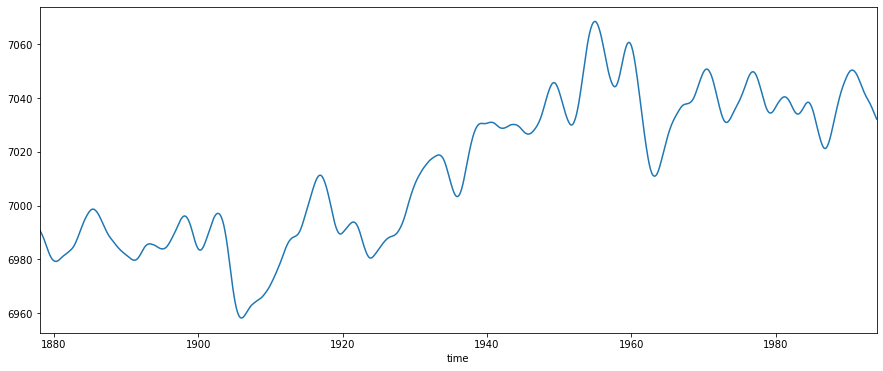

In [10]:
sea_level_cycle, sea_level_trend = hpfilter(data['sea_level'], lamb=1600*4*3)

#The Hodrick-Prescott smoothing parameter. A value of 1600 is suggested for quarterly data. 
#Ravn and Uhlig suggest using a value of 6.25 (1600/4**4) for annual data and 129600 (1600*3**4) for monthly data.

sea_level_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

Text(0, 0.5, 'Mean Sea Level')

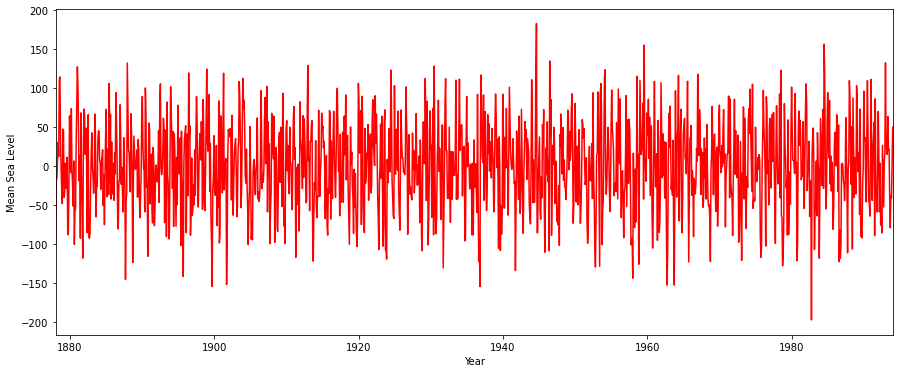

In [11]:
sea_level_cycle.plot(figsize=(15,6), color='red').autoscale(axis='x',tight=True)

plt.xlabel("Year")
plt.ylabel("Mean Sea Level")

In [12]:
sea_level_decomp = data[['sea_level']]
sea_level_decomp["sea_level_cycle"] = sea_level_cycle
sea_level_decomp["sea_level_trend"] = sea_level_trend

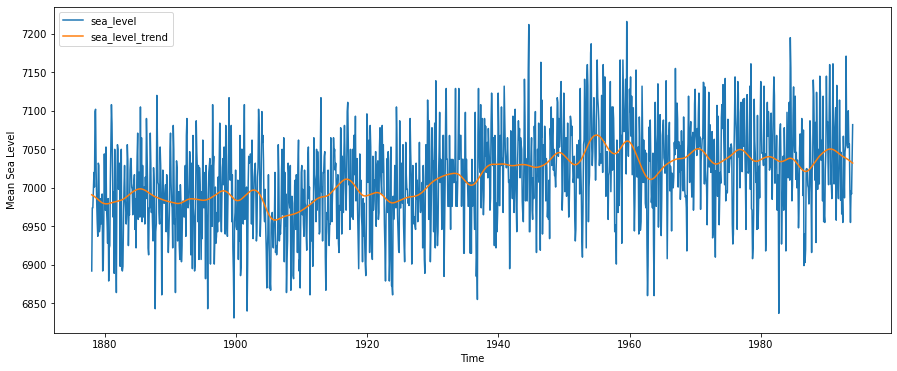

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
sea_level_decomp[["sea_level", "sea_level_trend"]].plot(ax=ax)
plt.xlabel("Time")
plt.ylabel("Mean Sea Level")
plt.show()

## Confidence intervals

[Text(0, 0.5, 'Sea level'), Text(0.5, 0, 'Time')]

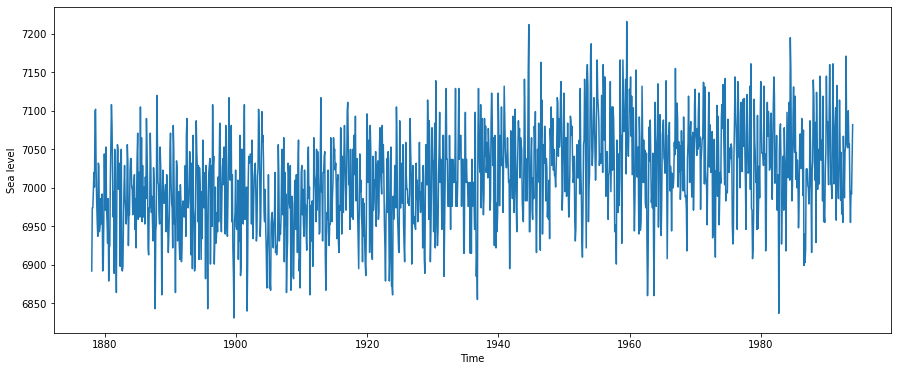

In [14]:
# Plot confidence interval
f = plt.figure(figsize=(15, 6))
ax = sns.lineplot(x=data.index.values, y=data["sea_level"], ci=99)
ax.set(xlabel="Time", ylabel = "Sea level")

In [41]:
#create 99% confidence interval for the data

st.t.interval(alpha=0.99, df=len(data["sea_level"])-1, loc=np.mean(data["sea_level"]), scale=st.sem(data["sea_level"]))

(7008.901214124717, 7017.682119208617)

In [16]:
#create 99% confidence interval using the normal distribution
CI99 = st.norm.interval(alpha=0.99, loc=np.mean(data), scale=st.sem(data))
CI99

(array([7008.9072382]), array([7017.67609514]))

In [17]:
#create 90% confidence interval using the normal distribution
CI90 = st.norm.interval(alpha=0.90, loc=np.mean(data), scale=st.sem(data))
CI90

(array([7010.49189144]), array([7016.09144189]))

Text(0, 0.5, 'Mean Sea Level')

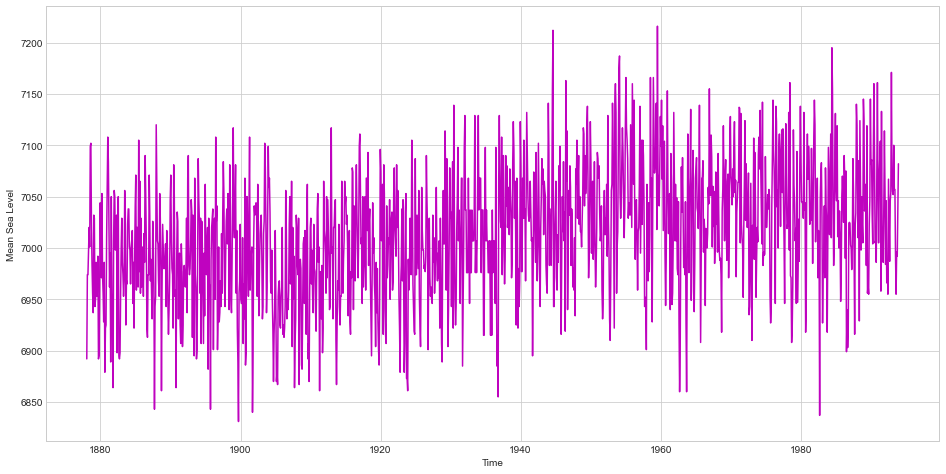

In [18]:
# plotting
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(data.index.values, data['sea_level'], 'k', alpha=0.99, color='m')
plt.xlabel("Time")
plt.ylabel("Mean Sea Level")

[Text(0, 0.5, 'Sea level'), Text(0.5, 0, 'Time')]

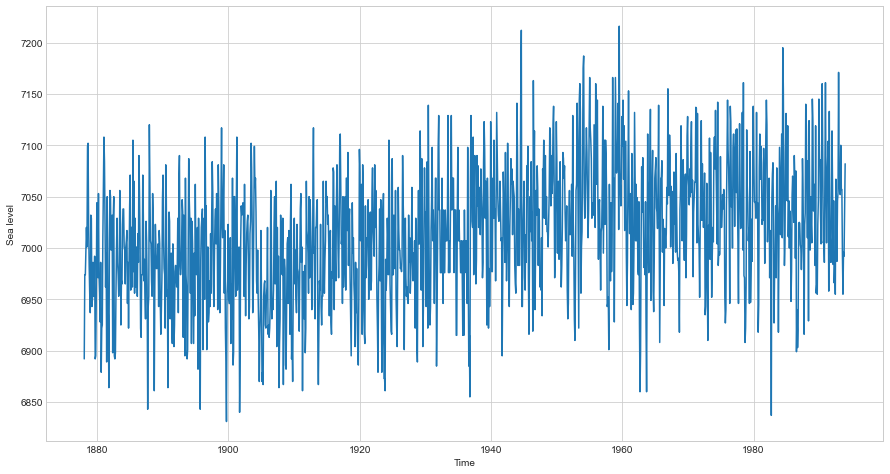

In [19]:
f = plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=data, x=data.index.values, y="sea_level", ci= 99)
ax.set(xlabel="Time", ylabel = "Sea level")

# NOTE: The CI doesn't seem to be right. It is giving same graph using different CI values

# Linear regression

0.6790348891892354 5698.680121196309


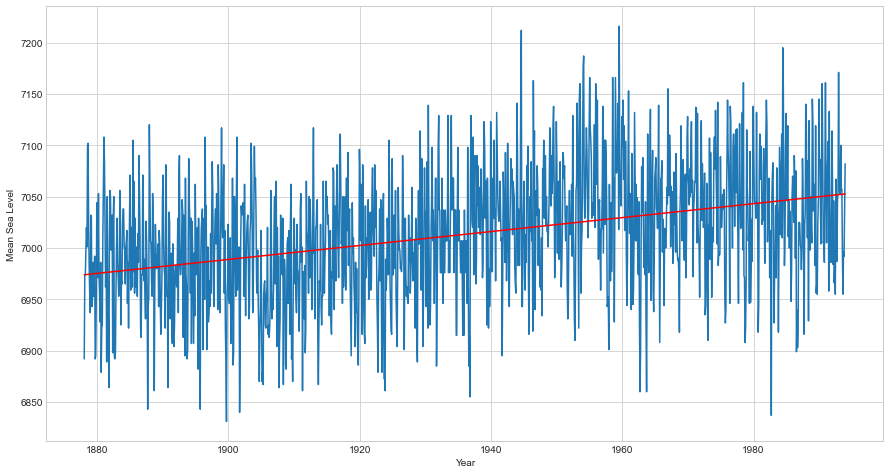

In [20]:
# Use Numpy's polynomial fit function
parameters = np.polyfit(data.index.values, data["sea_level"], deg = 1) #Linear trend is a polynomial of degree 1
(a,b) = parameters
trend = a*data.index.values + b

print(a, b)

f = plt.figure(figsize=(15, 8))
plt.plot(data.index.values, data["sea_level"])
plt.plot(data.index.values,trend, label='Polyfit Trend Line', color ='red')

#plt.legend("Linear fit")
plt.xlabel("Year")
plt.ylabel("Mean Sea Level")
plt.show()

# remember data is given in mm/month so convert estimates to mm/yr

## Ordinary Least Square (OLS) trend fit

In [29]:
# OLS trend fit

fig = px.scatter(data, x=data.index.values, y=data["sea_level"], trendline="ols", trendline_color_override='red')

fig.update_layout(title='Ordinary Least Square (OLS) Trend Fit')

fig.show()

In [30]:
results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     204.6
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           2.15e-43
Time:                        14:38:38   Log-Likelihood:                -7657.5
No. Observations:                1392   AIC:                         1.532e+04
Df Residuals:                    1390   BIC:                         1.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5698.6801     91.926     61.992      0.000    5518.351    5879.010
x1             0.6790      0.047     14.303      0.000       0.586       0.772
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.609
Skew:                          -0.075   Prob(JB):                        0.271
Kurtosis:                       2.851   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple actual vs predicted plot using Scikit-learn

In [37]:
# Split data into training and test splits

df = data

train_idx, test_idx = train_test_split(df.index, test_size=.25, random_state=0)
df['split'] = 'train'
df.loc[test_idx, 'split'] = 'test'

X = df.index.values
y = df['sea_level']
X_train = df.loc[train_idx, df.index.values]
y_train = df.loc[train_idx, df['sea_level']]

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X_train, y_train)
df['prediction'] = model.predict(X)

fig = px.scatter(
    df, x='sea_level', y='prediction',
    marginal_x='histogram', marginal_y='histogram',
    color='split', trendline='ols'
)
fig.update_traces(histnorm='probability', selector={'type':'histogram'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)

fig.show()

KeyError: "None of [Float64Index([1878.0416,  1878.125, 1878.2084, 1878.2916,  1878.375, 1878.4584,\n              1878.5416,  1878.625, 1878.7084, 1878.7916,\n              ...\n              1993.2084, 1993.2916,  1993.375, 1993.4584, 1993.5416,  1993.625,\n              1993.7084, 1993.7916,  1993.875, 1993.9584],\n             dtype='float64', length=1392)] are in the [columns]"

In [62]:
#define response variable
y = data['sea_level']

#define predictor variables
x = data.index.values

#add constant to predictor variables
x = sm.add_constant(x)

#fit OLS linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              sea_level   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     204.6
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           2.15e-43
Time:                        14:04:08   Log-Likelihood:                -7657.5
No. Observations:                1392   AIC:                         1.532e+04
Df Residuals:                    1390   BIC:                         1.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5698.6801     91.926     61.992      0.0

## Influencial statistics

In [63]:
infl = model.get_influence()
print(infl.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0   6892.000   6973.936      0.003     -1.383      0.003     -0.074     -1.384     -0.074
         1   6974.000   6973.993      0.000      0.000      0.003      0.000      0.000      0.000
         2   6974.000   6974.049      0.000     -0.001      0.003     -0.000     -0.001     -0.000
         3   6998.000   6974.106      0.000      0.403      0.003      0.022      0.403      0.022
         4   7020.000   6974.162      0.001      0.774      0.003      0.041      0.774      0.041
         5   7001.000   6974.219      0.000      0.452      0.003      0.024      0.452      0.024
         6   7099.000   6974.275      0.006      2.106      0.003      0.112      2.108      0.112
         7

In [64]:
df_infl = infl.summary_frame()
df_infl.head()

dfb_const    dfb_x1       cooks_d  standard_resid  hat_diag  \
time                                                                     
1878.0416  -0.064922  0.064289  2.754574e-03       -1.383379  0.002870   
1878.1250   0.000006 -0.000006  2.289187e-11        0.000126  0.002864   
1878.2084  -0.000039  0.000038  9.870449e-10       -0.000830  0.002858   
1878.2916   0.018840 -0.018655  2.327386e-04        0.403421  0.002852   
1878.3750   0.036095 -0.035741  8.546320e-04        0.773900  0.002846   

           dffits_internal  student_resid    dffits  
time                                                 
1878.0416        -0.074224      -1.383834 -0.074248  
1878.1250         0.000007       0.000126  0.000007  
1878.2084        -0.000044      -0.000830 -0.000044  
1878.2916         0.021575       0.403299  0.021568  
1878.3750         0.041343       0.773788  0.041337

In [ ]:
# from statsmodels.stats.outliers_influence import summary_table

# st, data, ss2 = summary_table(model, alpha=0.01)

# fittedvalues = data[:, 2]
# predict_mean_se  = data[:, 3]
# predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
# predict_ci_low, predict_ci_upp = data[:, 6:8].T

# # Check we got the right things
# print np.max(np.abs(re.fittedvalues - fittedvalues))
# print np.max(np.abs(iv_l - predict_ci_low))
# print np.max(np.abs(iv_u - predict_ci_upp))

# plt.plot(x, y, 'o')
# plt.plot(x, fittedvalues, '-', lw=2)
# plt.plot(x, predict_ci_low, 'r--', lw=2)
# plt.plot(x, predict_ci_upp, 'r--', lw=2)
# plt.plot(x, predict_mean_ci_low, 'r--', lw=2)
# plt.plot(x, predict_mean_ci_upp, 'r--', lw=2)
# plt.show()

In [68]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(model)

print(st, data, ss2)

       Obs    Dep Var  Predicted    Std Error    Mean ci    Mean ci Predict ci Predict ci   Residual  Std Error    Student     Cook's
           Population      Value Mean Predict    95% low    95% upp    95% low    95% upp              Residual   Residual          D
-------------------------------------------------------------------------------------------------------------------------------------
         1   6892.000   6973.936        3.178   6967.702   6980.170   6857.414   7090.457    -81.936     59.229     -1.383      0.003
         2   6974.000   6973.993        3.174   6967.765   6980.220   6857.471   7090.514      0.007     59.229      0.000      0.000
         3   6974.000   6974.049        3.171   6967.829   6980.270   6857.528   7090.570     -0.049     59.229     -0.001      0.000
         4   6998.000   6974.106        3.168   6967.892   6980.319   6857.585   7090.626     23.894     59.229      0.403      0.000
         5   7020.000   6974.162        3.164   6967.955   698

In [72]:
# from statsmodels.sandbox.regression.predstd import wls_prediction_std

# #define response variable
# y2 = data['sea_level']

# #define predictor variables
# x2 = data.index.values

# #add constant to predictor variables
# x2 = sm.add_constant(x)


# #fit OLS linear regression model
# model2 = sm.OLS(y2, x2).fit()

# #view model summary
# #print(model2.summary())


# prstd, iv_l, iv_u = wls_prediction_std(model2, alpha=0.01)

# print("The std is: ", prstd)
# print("The lower bound is: ", iv_l)
# print("The upper bound is: ", iv_u)


# # fig, ax = plt.subplots(figsize=(15,8))

# # ax.plot(x2, y2, 'o', label="data")
# # ax.plot(x2, y2, 'b-', label="True")
# # # ax.plot(x2, model2.fittedvalues, 'r--.', label="OLS")
# # ax.plot(y2, iv_u, 'r--')
# # ax.plot(y2, iv_l, 'r--')
# # ax.legend(loc='best');



# Quadratic regression fit

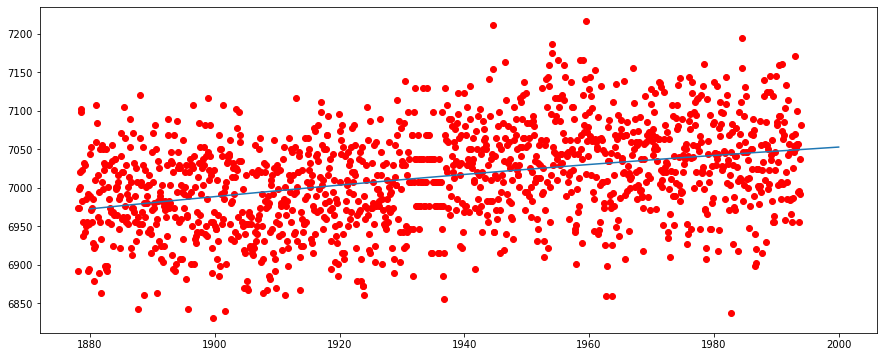

In [35]:
#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(data.index.values, data["sea_level"], 2))

#add fitted polynomial line to scatterplot
f = plt.figure(figsize=(15, 6))
polyline = np.linspace(1880, 2000, 10)
plt.scatter(data.index.values, data["sea_level"], color="red")
plt.plot(polyline, model(polyline))
plt.show()

In [36]:
print(model)

           2
-0.001289 x + 5.668 x + 870.7


In [ ]:
# #define function to calculate r-squared
# def polyfit(x, y, degree):
#     results = {}
#     coeffs = np.polyfit(x, y, degree)
#     p = np.poly1d(coeffs)
#     #calculate r-squared
#     yhat = p(x)
#     ybar = np.sum(y)/len(y)
#     ssreg = np.sum((yhat-ybar)**2)
#     sstot = np.sum((y - ybar)**2)
#     results['r_squared'] = ssreg / sstot

#     return results

# #find r-squared of polynomial model with degree = 3
# polyfit(data.index.values, data["sea_level"], 2)

## Polynomial regression using Scikit-learn method

The RMSE value for quadratic regression is:  59.25728175757947
The R^2 value for quadratic regression is:  0.1287064429700444


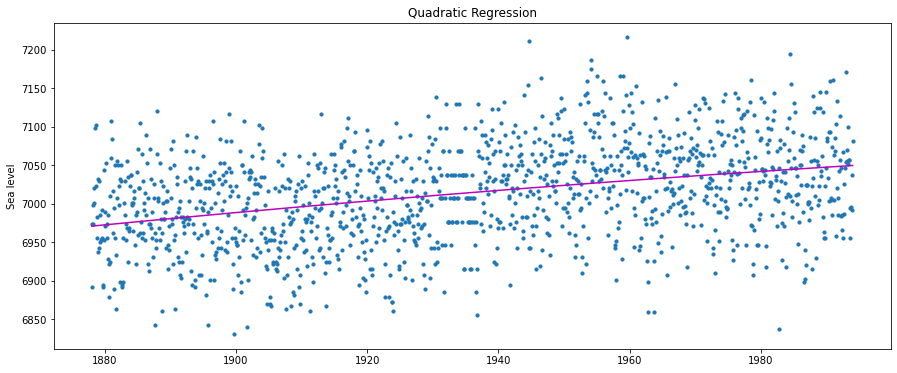

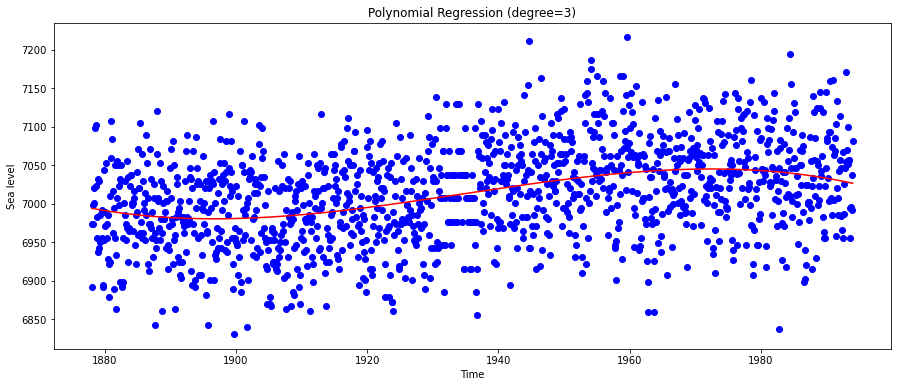

In [39]:
# Linear regression using Scikit-learn method

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

x = data.index.values
y = data["sea_level"]

# # # transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("The RMSE value for quadratic regression is: ", rmse)
print("The R^2 value for quadratic regression is: ", r2)

f = plt.figure(figsize=(15, 6))
plt.scatter(x, y, s=10)

# sort the values of x before line plot

sorted_zip = sorted(zip(x,y_poly_pred))
x, y_poly_pred = zip(*sorted_zip)

# Visualising the linear regression
plt.plot(x, y_poly_pred, color='m')
plt.title('Quadratic Regression')  
plt.ylabel('Sea level')
plt.show()


# Fitting Polynomial Regression to the dataset  
  
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)


# Visualising the Polynomial Regression results 
f = plt.figure(figsize=(15, 6))
plt.scatter(x, y, color = 'blue') 
  
plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red') 
plt.title('Polynomial Regression (degree=3)') 
plt.xlabel('Time') 
plt.ylabel('Sea level') 
  
plt.show() 

In [40]:
# Ordinary Least Squares (OLS) linear regression model 

Y = data['sea_level']
X = data.index.values
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    5698.680121
x1          0.679035
dtype: float64

In [41]:
results.tvalues

const    61.991715
x1       14.302823
dtype: float64

In [42]:
print(results.f_test(np.identity(2)))

<F test: F=array([[9730680.53673997]]), p=0.0, df_denom=1.39e+03, df_num=2>


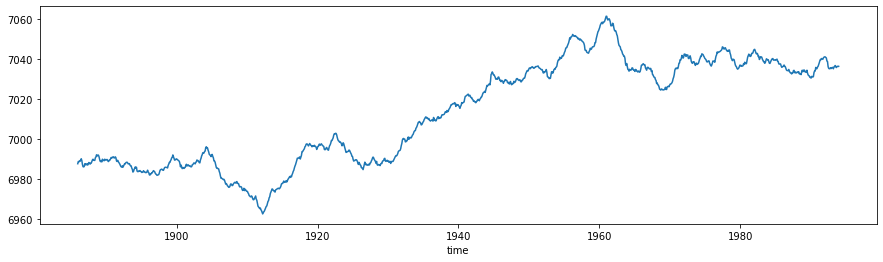

In [43]:
# Rolling

data['sea_level'].rolling(8*12).mean().plot(figsize=(15,4))

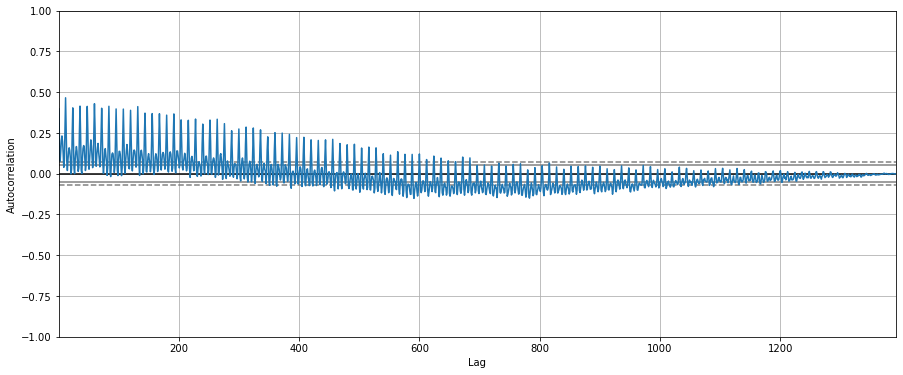

In [44]:
f = plt.figure(figsize=(15, 6))
pd.plotting.autocorrelation_plot(data["sea_level"])


# Create two time series of first and last five years

In [14]:
data_first_5 = data[1878.0416:1882.9584]

In [15]:
data_first_5.head()

sea_level
time                
1878.0416       6892
1878.1250       6974
1878.2084       6974
1878.2916       6998
1878.3750       7020

In [16]:
data_last_5 = data[1989.0416:]

In [18]:
data_last_5.head()

sea_level
time                
1989.0416       7124
1989.1250       7036
1989.2084       7042
1989.2916       7062
1989.3750       6983

# Dividing the time series into two halves and plotting

In [45]:
n = len(data)

In [46]:
n

1392

In [47]:
data_1 = data.iloc[0:696, 0:1]

In [48]:
data_1

sea_level
time                
1878.0416       6892
1878.1250       6974
1878.2084       6974
1878.2916       6998
1878.3750       7020
...              ...
1935.6250       6976
1935.7084       6915
1935.7916       7007
1935.8750       6915
1935.9584       7037

[696 rows x 1 columns]

In [49]:
data_2 = data.iloc[696:1393, 0:1]

In [50]:
data_2

sea_level
time                
1936.0416       6976
1936.1250       7007
1936.2084       7007
1936.2916       6976
1936.3750       6946
...              ...
1993.6250       6955
1993.7084       6996
1993.7916       6992
1993.8750       7037
1993.9584       7082

[696 rows x 1 columns]

In [51]:
# Plot the two half time series data

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data_1.index.values, 
    y=data_1.sea_level, 
    name='First half',
    line_color='deepskyblue'))

fig.add_trace(go.Scatter(
    x=data_2.index.values, 
    y=data_2.sea_level,
    name='Second half',
    line_color='red'))

fig.update_layout(
    template = "plotly_white",
    title_text="Mean Sea Level Time Series",
    xaxis_rangeslider_visible=True)

fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="Mean Sea Level (mm)")

fig.show()

In [72]:
data_1.describe(percentiles=[0.99, 0.90, 0.25, 0.50, 0.75])

sea_level
count   696.000000
mean   6989.333333
std      56.991059
min    6831.000000
25%    6953.000000
50%    6989.000000
75%    7029.750000
90%    7062.000000
99%    7114.150000
max    7139.000000

In [73]:
data_2.describe(percentiles=[0.99, 0.90, 0.25, 0.50, 0.75])

sea_level
count   696.00000
mean   7037.25000
std      60.61534
min    6837.00000
25%    6998.00000
50%    7040.00000
75%    7077.00000
90%    7118.00000
99%    7166.00000
max    7216.00000

In [94]:
data3 = pd.Series(pd.date_range('1878.0416', freq='M', periods=1392))

In [111]:

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data3, 
    y=data.sea_level, 
    name='First half',
    line_color='deepskyblue'))

fig.update_layout(
    template = "plotly_white",
    title_text="Mean Sea Level Time Series",
    xaxis_rangeslider_visible=True)

fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="Mean Sea Level (mm)")

fig.show()

In [123]:
def getDate(dat):
    #get str values of time
    getStr = lambda x: str(x)
    dat['time'] = pd.DataFrame(list(map(getStr, dat['time'])))
    #get year
    getYear = lambda x: x.split('.')[0]
    #get month
    getMonth = lambda x: x.split('.')[1][:2]
    #getdate
    getDate = lambda x: x.split('.')[1][2:]
    dat['year'] = pd.DataFrame(list(map(getYear, dat['time'])))
    dat['month'] = pd.DataFrame(list(map(getMonth, dat['time'])))
    dat['date'] = pd.DataFrame(list(map(getDate, dat['time'])))
    #concatenate year month date
    dat['concatDate'] = ['-'.join(i) for i in zip(dat["year"], dat["month"], dat['date'])]
    print(dat)
    #lambda function to convert string to date format
    getYearMonthDate = lambda x: (datetime.strptime(x, '%Y-%m-%d'))
    #convert string date to timeformat
    dat['timeFormat'] = pd.DataFrame(list(map(getYearMonthDate, dat['concatDate'])))
    return dat